In [1]:
# !pip uninstall ipython -y
# !pip install ipython

In [56]:
import spacy
from spacy import displacy

## Tokenization

In [57]:
str = "I am Arunava Samanta. I'm working for 80$ per month in U.S. country. My email id was aru001@gmail.com and weblink was www.aru.com"
str1 = "I love my India"

In [58]:
nlp = spacy.load("en_core_web_sm")

In [61]:
doc = nlp(str1)

In [6]:
#Tokens
for token in doc:
    #print (token.text,'----->',token.pos_)
    print(f"{token.text:20} {token.pos_:10} {token.tag_:10} {spacy.explain(token.tag_)}")

I                    PRON       PRP        pronoun, personal
love                 VERB       VBP        verb, non-3rd person singular present
my                   PRON       PRP$       pronoun, possessive
India                PROPN      NNP        noun, proper singular


In [7]:
doc[1]

love

In [8]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [9]:
type(doc)

spacy.tokens.doc.Doc

In [10]:
for sentense in doc.sents:
    print(sentense)

I love my India


In [11]:
for i in doc.ents:
    print(i, i.label_)

India GPE


## Stemming

In [12]:
import nltk

In [13]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer

In [14]:
porter1 = PorterStemmer()

In [15]:
words = ['run', 'Runs', 'runner', 'run-up', 'good', 'goods', 'easily', 'University', 'Universe']

In [16]:
for word in words:
    print(word + '------>' + porter1.stem(word))

run------>run
Runs------>run
runner------>runner
run-up------>run-up
good------>good
goods------>good
easily------>easili
University------>univers
Universe------>univers


In [17]:
porter2 = SnowballStemmer("english")

In [18]:
for word in words:
    print(word + '------>' + porter2.stem(word))

run------>run
Runs------>run
runner------>runner
run-up------>run-up
good------>good
goods------>good
easily------>easili
University------>univers
Universe------>univers


## Lemmatization

In [19]:
import spacy
nlp = spacy.load('en_core_web_sm')
words = 'He is playing video games.'
doc = nlp(words)
for word in doc:
    print(f"{word.text:10} {word.lemma_}")

He         he
is         be
playing    play
video      video
games      game
.          .


## Stop Words

In [20]:
import spacy
nlp = spacy.load('en_core_web_sm')
print(len(nlp.Defaults.stop_words))

326


In [21]:
print(nlp.Defaults.stop_words)

{'much', 'any', 'each', 'put', 'even', 'they', 'serious', 'few', 'might', 'anyhow', 'only', 'never', 'rather', 'between', 'you', 'therein', 'whereupon', 'before', 'becomes', 'nothing', 'everyone', 'yours', 'thereby', 'beforehand', "'ll", '’s', 'anyway', 'six', 'an', 'nor', 'it', 'wherever', 'whether', 'give', 'otherwise', 'seemed', 'almost', '‘re', 'myself', 'yet', 'really', 'onto', '‘d', 'until', 'already', 'not', 'though', 'something', 'still', 'together', 'amongst', 'third', 'than', 'four', 'that', 'and', 'while', 'various', 'less', 'other', 'out', 'enough', 'how', 'hereupon', 'are', 'its', 'we', 'with', 'am', 'besides', 'full', 'make', 'show', 'beyond', 'top', 'could', 'thence', 'had', 'alone', 'about', 'very', 'whatever', 'a', 'sixty', 'after', 'whereafter', 'via', 'more', 'seeming', 'my', 'during', 'done', 'where', 'always', 'whom', 'latterly', 'some', 'please', 'anything', 'except', 'yourself', "n't", 'or', 'elsewhere', 'hence', 'latter', 'will', 'formerly', '‘ve', 'do', 'be', '

In [22]:
print(nlp.vocab['them'].is_stop)
print(nlp.vocab['USA'].is_stop)

True
False


In [23]:
nlp.Defaults.stop_words.add("Arunava")
nlp.Defaults.stop_words.add("Samanta")
nlp.Defaults.stop_words.add("Raj")

In [24]:
nlp.Defaults.stop_words.remove("very")

In [25]:
print(nlp.Defaults.stop_words)

{'much', 'any', 'each', 'put', 'even', 'they', 'serious', 'few', 'might', 'anyhow', 'only', 'never', 'rather', 'between', 'you', 'therein', 'whereupon', 'before', 'becomes', 'nothing', 'everyone', 'yours', 'thereby', 'beforehand', "'ll", '’s', 'anyway', 'six', 'an', 'nor', 'it', 'wherever', 'whether', 'give', 'otherwise', 'seemed', 'almost', '‘re', 'myself', 'yet', 'really', 'onto', 'Samanta', '‘d', 'until', 'already', 'not', 'though', 'something', 'still', 'together', 'amongst', 'third', 'than', 'four', 'that', 'and', 'while', 'various', 'less', 'other', 'out', 'enough', 'how', 'hereupon', 'are', 'its', 'we', 'with', 'am', 'besides', 'full', 'make', 'show', 'beyond', 'top', 'could', 'thence', 'had', 'alone', 'about', 'whatever', 'a', 'sixty', 'after', 'whereafter', 'via', 'more', 'seeming', 'my', 'during', 'done', 'where', 'always', 'whom', 'latterly', 'some', 'please', 'anything', 'except', 'yourself', "n't", 'or', 'elsewhere', 'hence', 'latter', 'will', 'formerly', '‘ve', 'do', 'be'

In [26]:
print(len(nlp.Defaults.stop_words))

328


In [27]:
# How to remove stop words

In [33]:
doc

He is playing video games.

In [35]:
for token in doc:
    if token.is_stop:
        print(token)

He
is


In [45]:
without_stopwords=""
for token in doc:
    if token.is_stop or token.is_punct:
        continue
    else:
        without_stopwords += token.text + " "
print(without_stopwords)

playing video games 


## Vocab

In [64]:
import spacy
nlp = spacy.load("en_core_web_sm")
print(nlp.vocab["apple"].orth)  # Integer ID

8566208034543834098


## Part of Speech

In [27]:
nlp = spacy.load('en_core_web_sm')

In [28]:
doc = nlp('The quick brown fox jumps over the lazy dog')

In [29]:
print(f"{'Text':10} {'Lemma':10} {'POS':10} {'Tag':10} {'Explanation'}")
print(f"{'-'*60}")

for token in doc:
    print(f"{token.text:10} {token.lemma_:10} {token.pos_:10} {token.tag_:10} {spacy.explain(token.tag_)}")

Text       Lemma      POS        Tag        Explanation
------------------------------------------------------------
The        the        DET        DT         determiner
quick      quick      ADJ        JJ         adjective (English), other noun-modifier (Chinese)
brown      brown      ADJ        JJ         adjective (English), other noun-modifier (Chinese)
fox        fox        NOUN       NN         noun, singular or mass
jumps      jump       VERB       VBZ        verb, 3rd person singular present
over       over       ADP        IN         conjunction, subordinating or preposition
the        the        DET        DT         determiner
lazy       lazy       ADJ        JJ         adjective (English), other noun-modifier (Chinese)
dog        dog        NOUN       NN         noun, singular or mass


## Visualize POS

In [30]:
from spacy import displacy

In [31]:
options = {'distance': 100, 'color': 'blue'}

# Render HTML without using Jupyter
html = displacy.render(doc, style="dep", options=options, jupyter=False)

# Save to file
with open("dependency_parse.html", "w", encoding="utf-8") as f:
    f.write(html)

## Named Entity Recognition

In [32]:
nlp = spacy.load("en_core_web_sm")

In [33]:
def ner_details(doc):
    if doc.ents:
        for ner in doc.ents:
            print(f"{ner.text:20} {ner.label_:10} {spacy.explain(ner.label_)}")
    else:
        print("No NER Founds")

In [34]:
doc = nlp("Arunava works for Capgemini Pvt. Ltd. in Kolkata since June 2024")
ner_details(doc)

Arunava              PERSON     People, including fictional
Capgemini Pvt. Ltd.  ORG        Companies, agencies, institutions, etc.
Kolkata              GPE        Countries, cities, states
June 2024            DATE       Absolute or relative dates or periods


In [35]:
doc = nlp("Tes is a very good")
ner_details(doc)

No NER Founds


In [36]:
#Add a new entity
from spacy.tokens import Span

In [37]:
new_ent = Span(doc, 0, 1, doc.vocab.strings["ORG"]) # 0 is the starting index and 1 is the ending index. means only one word

In [38]:
doc.ents = list(doc.ents) + [new_ent]

In [39]:
ner_details(doc)

Tes                  ORG        Companies, agencies, institutions, etc.


### Visualize NER

In [40]:
options = {'distance': 100, 'color': 'blue'}

# Render HTML without using Jupyter
html = displacy.render(doc, style="ent", options=options, jupyter=False)

# Save to file
with open("dependency_parse.html", "w", encoding="utf-8") as f:
    f.write(html)

## Sentense Segmentation

In [47]:
nlp = spacy.load('en_core_web_sm')
doc = nlp("The Earth's landmass is divided into continents. Such as Africa, Asia, Europe, North America, South America, and Australia")

In [50]:
for token in doc.sents:
    print(token.text)

The Earth's landmass is divided into continents.
Such as Africa, Asia, Europe, North America, South America, and Australia


In [53]:
list(doc.sents)[0]

The Earth's landmass is divided into continents.

In [ ]:
####################################################################################################################

# Machine Learning

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [57]:
df = pd.read_csv(r"C:\Users\ARSAMANT\Downloads\UPDATED_NLP_COURSE\UPDATED_NLP_COURSE\TextFiles\smsspamcollection.tsv", sep='\t')

In [58]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [59]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [60]:
df.drop_duplicates()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [61]:
print("Rows are: ",len(df))
print("Columns are: ",len(df.columns))

Rows are:  5572
Columns are:  4


In [62]:
labels = df['label'].nunique()
print(labels)
labels = df['label'].unique()
print(labels)

2
['ham' 'spam']


In [63]:
x = df[['length','punct']]
y = df['label']

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x, y ,test_size=0.2, random_state=42)

print(x.shape)
print(y.shape)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(5572, 2)
(5572,)
(4457, 2)
(4457,)
(1115, 2)
(1115,)


# <span style="color:#90ee90">Logistic Regression</span>

In [65]:
model1 = LogisticRegression(random_state=42)
model1.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [66]:
y_pred1 = model1.predict(x_test)

In [67]:
y_pred1

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'],
      shape=(1115,), dtype=object)

In [79]:
cm = confusion_matrix(y_test, y_pred1)
print(cm)

[[931  35]
 [145   4]]


In [78]:
cr = classification_report(y_test, y_pred1)
print(cr)

              precision    recall  f1-score   support

         ham       0.87      0.96      0.91       966
        spam       0.10      0.03      0.04       149

    accuracy                           0.84      1115
   macro avg       0.48      0.50      0.48      1115
weighted avg       0.76      0.84      0.80      1115



In [68]:
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy is: ",accuracy)

Accuracy is:  0.8385650224215246


# <span style="color:#10fe90">RandomForestClassifier</span>

In [69]:
model2 = RandomForestClassifier(random_state=42)
model2.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [71]:
y_pred2= model2.predict(x_test)
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy is: ",accuracy)

Accuracy is:  0.885201793721973


# <span style="color:#90de65">KNeighborsClassifiers</span>

In [72]:
model3 = KNeighborsClassifier()
model3.fit(x_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [73]:
y_pred3 = model3.predict(x_test)
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy is: ", accuracy)

Accuracy is:  0.8807174887892377


## Feature Extraction

#### Bag-of-Words

Bag-of-Words counts the number of times each word or n-gram (combination of n words) appears in a document.

In [48]:
import spacy
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
nlp = spacy.load('en_core_web_sm')
str = 'I am Arunava. I am a good boy.'
doc = nlp(str)

In [49]:
for token in doc.sents:
    print(token)

I am Arunava.
I am a good boy.


In [50]:
vector1 = CountVectorizer(token_pattern=r"(?u)\b\w+\b")

In [51]:
sentense=[]
for i in doc.sents:
    sentense.append(i.text)
transformer1 = vector1.fit_transform(sentense)

In [52]:
print(vector1.get_feature_names_out())
transformer1.toarray()

['a' 'am' 'arunava' 'boy' 'good' 'i']


array([[0, 1, 1, 0, 0, 1],
       [1, 1, 0, 1, 1, 1]])

In [53]:
pd.DataFrame(transformer1.toarray(), columns= vector1.get_feature_names_out())

,a,am,arunava,boy,good,i
0,0,1,1,0,0,1
1,1,1,0,1,1,1


#### TF-iDF

Term Frequency.

Inverse Document Frequency.

TF(word in a document)= Number of occurrences of that word in document / Number of words in document

IDF(word in a corpus)=log(number of documents in the corpus / number of documents that include the word)

In [44]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
for token in doc.sents:
    print(token)

I am Arunava.
I am a good boy.


In [57]:
vector2 = TfidfVectorizer() #token_pattern=r"(?u)\b\w+\b"

In [58]:
sentense=[]
for i in doc.sents:
    sentense.append(i.text)
transformer2 = vector2.fit_transform(sentense)

In [59]:
pd.DataFrame(transformer2.toarray(), columns=vector2.get_feature_names_out())

,am,arunava,boy,good
0,0.579739,0.814802,0.000000,0.000000
1,0.449436,0.000000,0.631667,0.631667


# Movie Review

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [112]:
df = pd.read_csv(r"C:\Users\ARSAMANT\Downloads\UPDATED_NLP_COURSE\UPDATED_NLP_COURSE\TextFiles\moviereviews2.tsv" ,sep='\t')

In [113]:
df.head(5)

,label,review
0,pos,I loved this movie and will watch it again. Or...
1,pos,"A warm, touching movie that has a fantasy-like..."
2,pos,I was not expecting the powerful filmmaking ex...
3,neg,"This so-called ""documentary"" tries to tell tha..."
4,pos,This show has been my escape from reality for ...


### Rows and Columns count

In [114]:
print("Rows are: ", len(df))
print("Columns are: ", len(df.columns))

Rows are:  6000
Columns are:  2


### Check null values

In [115]:
print("Count of null values:")
df.isnull().sum()

Count of null values:


label      0
review    20
dtype: int64

### Drop null & duplicate values

In [116]:
df = df.drop_duplicates()

In [117]:
df = df.dropna()

In [118]:
print("Count of null values:")
df.isnull().sum()

Count of null values:


label     0
review    0
dtype: int64

In [119]:
print("Rows are: ", len(df))
print("Columns are: ", len(df.columns))

Rows are:  5966
Columns are:  2


### Add a column

In [120]:
df['length'] = df['review'].str.split().str.len()
df.head(3)

,label,review,length
0,pos,I loved this movie and will watch it again. Or...,45
1,pos,"A warm, touching movie that has a fantasy-like...",97
2,pos,I was not expecting the powerful filmmaking ex...,241


In [268]:
df['review'][0]

"I loved this movie and will watch it again. Original twist to Plot of Man vs Man vs Self. I think this is Kurt Russell's best movie. His eyes conveyed more than most actors words. Perhaps there's hope for Mankind in spite of Government Intervention?"

### Delete blank reviews

In [269]:
blank = df[df['review'].str.strip() == ''].index.tolist()
blank

[]

In [270]:
df = df.drop(blank)

In [271]:
print("Rows are: ", len(df))
print("Columns are: ", len(df.columns))

Rows are:  5966
Columns are:  3


### Plots

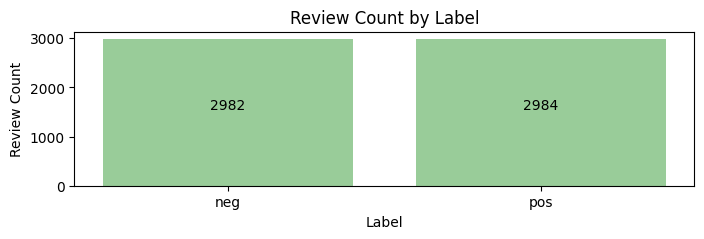

In [272]:
labels = df.groupby('label')['review'].count()
fig = plt.figure(figsize=(8,2))
bars = plt.bar(labels.index, labels.values, color='g', alpha=0.4)
plt.xlabel('Label')
plt.ylabel('Review Count')
plt.title('Review Count by Label')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height/2, f'{height}', ha='center', va='bottom')
plt.show()

In [273]:
df['length'].describe()

count    5966.000000
mean      174.065873
std        87.204037
min        10.000000
25%       120.000000
50%       151.500000
75%       218.000000
max       480.000000
Name: length, dtype: float64

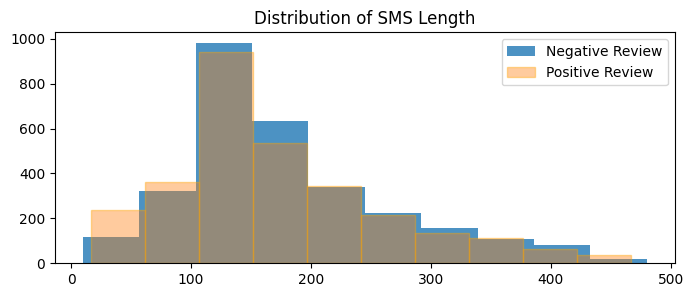

In [274]:
fig = plt.figure(figsize=(8,3))
plt.hist(df[df['label']=='neg']['length'], alpha=0.8, label='Negative Review')
plt.hist(df[df['label']=='pos']['length'], alpha=0.4, label='Positive Review', edgecolor='orange')
plt.title('Distribution of SMS Length')
plt.legend()
plt.show()

In [275]:
df.head(5)

,label,review,length
0,pos,I loved this movie and will watch it again. Or...,45
1,pos,"A warm, touching movie that has a fantasy-like...",97
2,pos,I was not expecting the powerful filmmaking ex...,241
3,neg,"This so-called ""documentary"" tries to tell tha...",345
4,pos,This show has been my escape from reality for ...,231


### Encoding

In [276]:
y=df['label']
x=df['review']

In [277]:
vector = TfidfVectorizer()
x=vector.fit_transform(x)

In [278]:
print(x.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Split

In [279]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x.shape)
print(y.shape)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(5966, 34135)
(5966,)
(4772, 34135)
(4772,)
(1194, 34135)
(1194,)


### Classification

In [282]:
model = LogisticRegression()
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [283]:
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(acc)
cm = confusion_matrix(y_test, y_pred)
print(cm)

0.9254606365159129
[[533  44]
 [ 45 572]]


In [298]:
y_pred

array(['pos', 'pos', 'pos', ..., 'neg', 'pos', 'pos'],
      shape=(1194,), dtype=object)

In [303]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

         neg       0.92      0.92      0.92       577
         pos       0.93      0.93      0.93       617

    accuracy                           0.93      1194
   macro avg       0.93      0.93      0.93      1194
weighted avg       0.93      0.93      0.93      1194



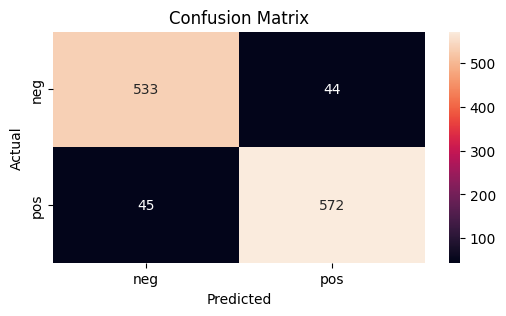

In [301]:
labels = np.unique(y_test)  # Automatically get class names
cm = confusion_matrix(y_test, y_pred, labels=labels)
fig = plt.figure(figsize=(6,3))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Word Vector

In [79]:
#!python -m spacy download en_core_web_lg

In [80]:
import spacy

In [81]:
nlp = spacy.load("en_core_web_lg")

In [82]:
word1 = 'king is SRK'
word2 = 'Dog Cat Pet Arunava'

In [83]:
x = (nlp(word1).vector)

In [84]:
x.shape

(300,)

In [85]:
len(nlp.vocab.vectors)

342918

In [86]:
for i in nlp(word2):
    for j in nlp(word2):
        print(i, j, i.similarity(j))

Dog Dog 1.0
Dog Cat 0.8016854524612427
Dog Pet 0.8057451844215393
Dog Arunava 0.0
Cat Dog 0.8016854524612427
Cat Cat 1.0
Cat Pet 0.7505456805229187
Cat Arunava 0.0
Pet Dog 0.8057451844215393
Pet Cat 0.7505456805229187
Pet Pet 1.0
Pet Arunava 0.0
Arunava Dog 0.0
Arunava Cat 0.0
Arunava Pet 0.0
Arunava Arunava 1.0


C:\Users\ARSAMANT\AppData\Local\Temp\ipykernel_18760\1154024276.py:3: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  print(i, j, i.similarity(j))


In [87]:
for i in nlp(word2):
    print(i.text, i.has_vector, i.vector_norm)

Dog True 7.0336733
Cat True 6.6808186
Pet True 6.9826565
Arunava False 0.0


## Sentiment Analysis using NLTK

In [128]:
import nltk
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

In [101]:
#nltk.download('vader_lexicon')

In [91]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [92]:
sia = SentimentIntensityAnalyzer()

In [100]:
word = "India Pakistan War"
sia.polarity_scores(word)

{'neg': 0.661, 'neu': 0.339, 'pos': 0.0, 'compound': -0.5994}

In [121]:
df.head(4)

,label,review,length
0,pos,I loved this movie and will watch it again. Or...,45
1,pos,"A warm, touching movie that has a fantasy-like...",97
2,pos,I was not expecting the powerful filmmaking ex...,241
3,neg,"This so-called ""documentary"" tries to tell tha...",345


In [122]:
compound_scores = []
# Loop through each review and get the compound score
for review in df['review']:
    score = sia.polarity_scores(review)['compound']
    compound_scores.append(score)
# Add the scores to a new column
df['compound'] = compound_scores

In [123]:
df.head(4)

,label,review,length,compound
0,pos,I loved this movie and will watch it again. Or...,45,0.8720
1,pos,"A warm, touching movie that has a fantasy-like...",97,0.9549
2,pos,I was not expecting the powerful filmmaking ex...,241,0.7201
3,neg,"This so-called ""documentary"" tries to tell tha...",345,-0.9821


In [126]:
labels = []

# Loop through compound scores and assign labels
for score in df['compound']:
    if score >= 0:
        labels.append('pos')
    else:
        labels.append('neg')
# Add the labels to a new column
df['com_label'] = labels

In [127]:
df.head(4)

,label,review,length,compound,com_label
0,pos,I loved this movie and will watch it again. Or...,45,0.8720,pos
1,pos,"A warm, touching movie that has a fantasy-like...",97,0.9549,pos
2,pos,I was not expecting the powerful filmmaking ex...,241,0.7201,pos
3,neg,"This so-called ""documentary"" tries to tell tha...",345,-0.9821,neg


In [131]:
cm = confusion_matrix(df['label'], df['com_label'])
print(cm)

[[1734 1248]
 [ 348 2636]]


In [133]:
cr = classification_report(df['label'], df['com_label'])
print(cr)

              precision    recall  f1-score   support

         neg       0.83      0.58      0.68      2982
         pos       0.68      0.88      0.77      2984

    accuracy                           0.73      5966
   macro avg       0.76      0.73      0.73      5966
weighted avg       0.76      0.73      0.73      5966



## Topic Modelling - LatentDirichletAllocation

In [33]:
import spacy
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [34]:
nlp = spacy.load('en_core_web_lg')

In [35]:
df = pd.read_csv(r"C:\Users\ARSAMANT\Downloads\UPDATED_NLP_COURSE\UPDATED_NLP_COURSE\05-Topic-Modeling\npr.csv")

In [36]:
df.head(2)

,Article
0,"In the Washington of 2016, even when the polic..."
1,Donald Trump has used Twitter — his prefe...


In [15]:
len(df.columns)
len(df)

11992

In [17]:
df.isnull().sum()

Article    0
dtype: int64

In [22]:
blank = df[df['Article'].str.strip() == ''].index.tolist()
blank

[]

In [23]:
df.drop(blank, inplace=True)

In [24]:
len(df.columns)
len(df)

11992

In [28]:
vector = CountVectorizer(stop_words='english')

In [29]:
t = vector.fit_transform(df['Article'])

In [32]:
t.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], shape=(11992, 95985))

In [37]:
lda = LatentDirichletAllocation(n_components=10, random_state=42)

In [38]:
lda.fit(t)

,n_components,10
,doc_topic_prior,None
,topic_word_prior,None
,learning_method,'batch'
,learning_decay,0.7
,learning_offset,10.0
,max_iter,10
,batch_size,128
,evaluate_every,-1
,total_samples,1000000.0
,perp_tol,0.1


In [41]:
print(len(lda.components_))
type(lda.components_)

10


numpy.ndarray

In [42]:
vector.get_feature_names_out()

array(['00', '000', '00000', ..., '脱贫', '반갑습니다', 'ﬁnd'],
      shape=(95985,), dtype=object)